In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score , mean_absolute_error

In [2]:
raw_df = pd.read_csv('laptop_data.csv')
raw_df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
raw_df.drop('Unnamed: 0' , axis = 1,inplace = True)

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [5]:
raw_df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
raw_df.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


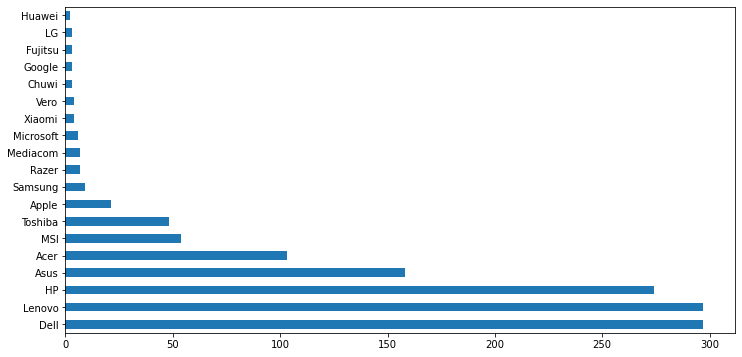

In [7]:
plt.figure(figsize = (12,6))
raw_df['Company'].value_counts().plot(kind = 'barh');

In [8]:
raw_df.TypeName.unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

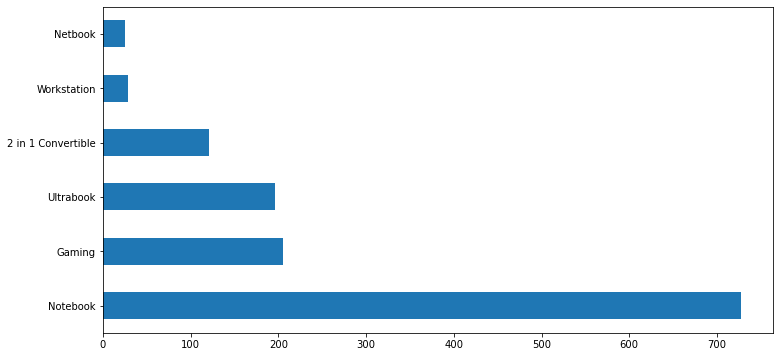

In [9]:
plt.figure(figsize = (12,6))
raw_df['TypeName'].value_counts().plot(kind = 'barh');

C:\Users\SAKSHAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


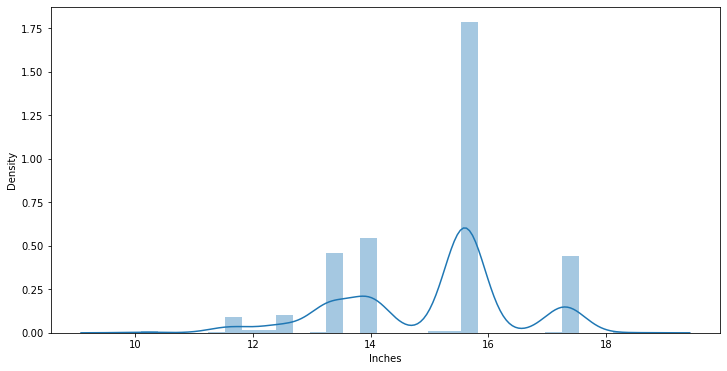

In [10]:
plt.figure(figsize = (12,6))
sns.distplot(raw_df['Inches']);

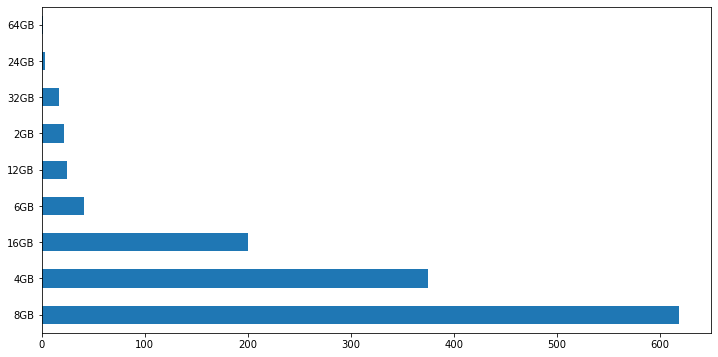

In [11]:
plt.figure(figsize = (12,6))
raw_df['Ram'].value_counts().plot(kind = 'barh');

In [12]:
raw_df.OpSys.value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

C:\Users\SAKSHAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


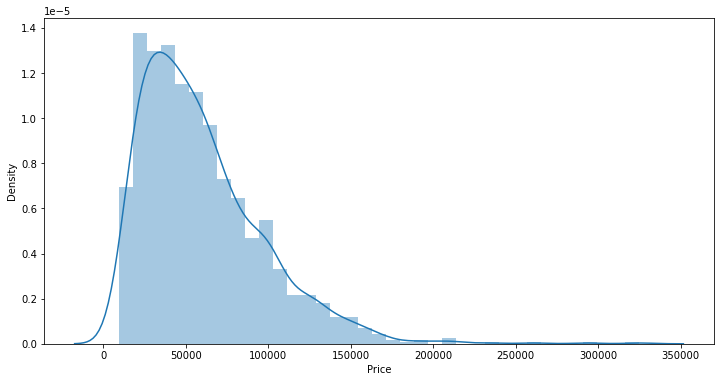

In [13]:
plt.figure(figsize = (12,6))
sns.distplot(raw_df['Price']);

In [14]:
raw_df['Ram'] = raw_df['Ram'].str.replace('GB','')
raw_df['Weight'] = raw_df['Weight'].str.replace('kg','')

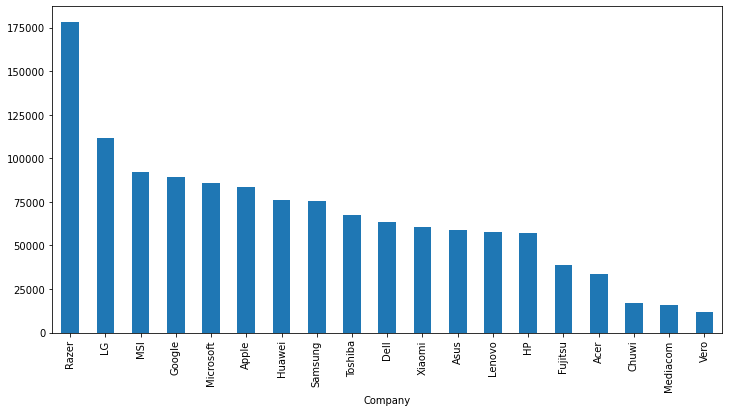

In [15]:
plt.figure(figsize = (12,6))
raw_df.groupby('Company')['Price'].mean().sort_values(ascending = False).plot(kind = 'bar');

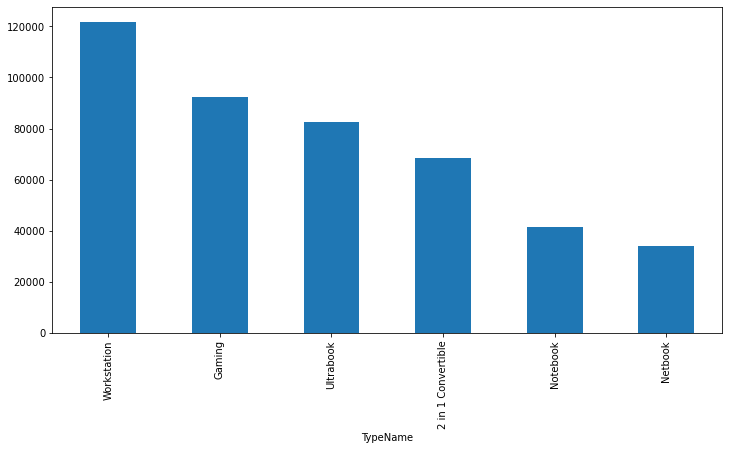

In [16]:
plt.figure(figsize = (12,6))
raw_df.groupby('TypeName')['Price'].mean().sort_values(ascending = False).plot(kind = 'bar');

In [17]:
raw_df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [18]:
raw_df['Touchscreen'] = raw_df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [19]:
raw_df.Touchscreen.value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

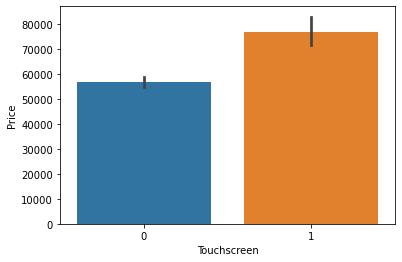

In [20]:
sns.barplot(data = raw_df , x ='Touchscreen' , y = 'Price');

In [21]:
raw_df['IPS Panel'] = raw_df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [22]:
raw_df['IPS Panel'].value_counts()

0    938
1    365
Name: IPS Panel, dtype: int64

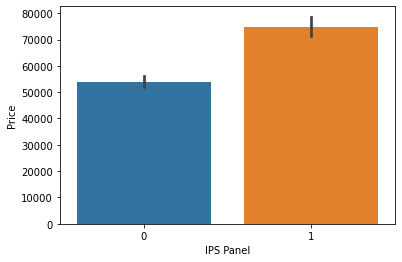

In [23]:
sns.barplot(data = raw_df , x ='IPS Panel' , y = 'Price');

In [24]:
raw_df['Ram']=raw_df['Ram'].astype(int)
raw_df['Weight']=raw_df['Weight'].astype('float')

In [25]:
raw_df['X_res'] = raw_df['ScreenResolution'].apply(lambda x:x.split()[-1].split('x')[0])
raw_df['Y_res'] = raw_df['ScreenResolution'].apply(lambda x:x.split()[-1].split('x')[1])

In [26]:
raw_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [27]:
raw_df['X_res']=raw_df['X_res'].astype(int)
raw_df['Y_res']=raw_df['Y_res'].astype(int)

In [28]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS Panel         1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [29]:
raw_df['ppi'] = (raw_df['X_res'] ** 2 + raw_df['Y_res'] ** 2)**0.5/raw_df['Inches']

In [30]:
raw_df['cpu_name']=raw_df.Cpu.apply(lambda x:" ".join(x.split()[0:3]))

In [31]:
def fetch_cpu_name(text):
    if text == 'Intel Core i5' or text == 'Intel Core i7' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

raw_df['cpu'] = raw_df.cpu_name.apply(fetch_cpu_name)

In [32]:
raw_df.drop(['Cpu','ScreenResolution','cpu_name'] ,axis = 1 , inplace = True)

In [33]:
raw_df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,X_res,Y_res,ppi,cpu
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5


In [34]:
raw_df.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [35]:
df = raw_df.copy()

In [36]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)


C:\Users\SAKSHAM\AppData\Local\Temp/ipykernel_18776/3372997381.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\SAKSHAM\AppData\Local\Temp/ipykernel_18776/3372997381.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [37]:
df.drop('Memory' ,axis = 1 , inplace=True)

In [38]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,X_res,Y_res,ppi,cpu,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256,0,0


In [39]:
df.corr()['Price']

Inches           0.068197
Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS Panel        0.252208
X_res            0.556529
Y_res            0.552809
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [40]:
df.drop(['Hybrid','Flash_Storage'],axis = 1 , inplace= True)

In [41]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [42]:
df['gpu_brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df['gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: gpu_brand, dtype: int64

In [43]:
df = df[df['gpu_brand'] != 'ARM']

In [44]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,X_res,Y_res,ppi,cpu,HDD,SSD,gpu_brand
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256,Intel


In [45]:
df.drop('Gpu',axis = 1 , inplace = True)

In [46]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [47]:
def get_os(text):
    if text == 'Windows 10' or text == 'Windows 7' or text=='Windows 10 S':
        return 'Windows'
    elif text == 'macOS' or text == 'Mac OS X':
        return 'Mac'
    else:
        return 'Other OS'

In [48]:
df['OpSys'] = df['OpSys'].apply(get_os)

In [49]:
df.OpSys.value_counts()

Windows     1125
Other OS     156
Mac           21
Name: OpSys, dtype: int64

<AxesSubplot:xlabel='OpSys', ylabel='Price'>

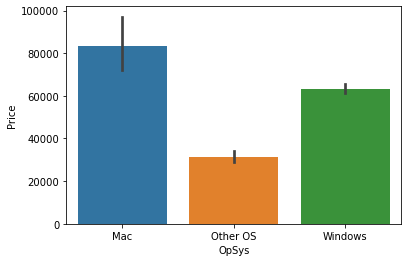

In [50]:
sns.barplot(data = df,x = 'OpSys',y = 'Price')

In [51]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,IPS Panel,X_res,Y_res,ppi,cpu,HDD,SSD,gpu_brand
0,Apple,Ultrabook,13.3,8,Mac,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,Mac,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,Other OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,Mac,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,Mac,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256,Intel


In [52]:
df.drop(['Inches' , 'X_res' ,'Y_res'],axis = 1 , inplace = True)

In [53]:
X = df.drop('Price',axis = 1)
y = np.log(df['Price'])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
X_train

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,IPS Panel,ppi,cpu,HDD,SSD,gpu_brand
613,Dell,Notebook,4,Other OS,2.25,0,0,100.454670,Intel Core i3,1000,0,Intel
823,MSI,Gaming,8,Windows,2.40,0,0,141.211998,Intel Core i5,0,256,Nvidia
5,Acer,Notebook,4,Windows,2.10,0,0,100.454670,AMD Processor,500,0,AMD
100,HP,Notebook,8,Windows,1.91,0,0,141.211998,Intel Core i7,0,256,AMD
424,Dell,Gaming,16,Windows,4.42,0,1,169.780899,Intel Core i7,1000,256,Nvidia
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,8,Windows,2.40,0,0,141.211998,Intel Core i5,1000,256,Nvidia
1130,HP,Notebook,8,Windows,2.04,0,0,100.454670,Intel Core i7,2000,0,Intel
1295,Dell,Notebook,8,Other OS,2.30,0,0,100.454670,Intel Core i7,1000,0,AMD
860,Lenovo,Notebook,8,Windows,2.30,0,1,141.211998,Intel Core i5,1000,0,Intel


## Linear Regression

In [63]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe1.fit(X_train,y_train)

y_pred = pipe1.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.802990520492061
MAE 0.21506377507602056


## Lasso Regression

In [64]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe2.fit(X_train,y_train)

y_pred = pipe2.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8019601131184416
MAE 0.21927454787552622


## Ridge Regression

In [65]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe3 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe3.fit(X_train,y_train)

y_pred = pipe3.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8011594489007016
MAE 0.22061760386110119


## Random Forest

In [66]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False , drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe4 = Pipeline([('step1' , step1),
                 ('step2' , step2)])

pipe4.fit(X_train,y_train)

predictions = pipe4.predict(X_test)

print('r2_score',r2_score(y_test,predictions))
print('MAE',mean_absolute_error(y_test,predictions))

r2_score 0.8683638500705646
MAE 0.17477831685427406


In [68]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe4,open('pipe4.pkl','wb'))